# Data Visualization

> (c) 2019 Galit Shmueli, Peter C. Bruce, Peter Gedeck 
>

In [1]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pylab as plt
import seaborn as sns

### Breakfast Cereals
Data were collected on the nutritional information and consumer rating of 77 breakfast cereals.1 The consumer rating is a rating of cereal “healthiness” for consumer information (not a rating by consumers). For each cereal, the data include 13 numerical variables, and we are interested in reducing this dimension. For each cereal, the information is based on a bowl of cereal rather than a serving size, because most people simply fill a cereal bowl (resulting in constant volume, but not weight). A snapshot of these data is given in Table 4.8, and the description of the different variables is given in Table 4.9.

In [15]:
cereals_df = pd.read_csv('Cereals.csv')
cereals_df.head(10)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100%_Bran,N,C,70,4,1,130,10.0,5.0,6.0,280.0,25,3,1.00,0.33,68.402973
1,100%_Natural_Bran,Q,C,120,3,5,15,2.0,8.0,8.0,135.0,0,3,1.00,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5.0,320.0,25,3,1.00,0.33,59.425505
3,All-Bran_with_Extra_Fiber,K,C,50,4,0,140,14.0,8.0,0.0,330.0,25,3,1.00,0.50,93.704912
4,Almond_Delight,R,C,110,2,2,200,1.0,14.0,8.0,NaN,25,3,1.00,0.75,34.384843
5,Apple_Cinnamon_Cheerios,G,C,110,2,2,180,1.5,10.5,10.0,70.0,25,1,1.00,0.75,29.509541
6,Apple_Jacks,K,C,110,2,0,125,1.0,11.0,14.0,30.0,25,2,1.00,1.00,33.174094
7,Basic_4,G,C,130,3,2,210,2.0,18.0,8.0,100.0,25,3,1.33,0.75,37.038562
8,Bran_Chex,R,C,90,2,1,200,4.0,15.0,6.0,125.0,25,1,1.00,0.67,49.120253
9,Bran_Flakes,P,C,90,3,0,210,5.0,13.0,5.0,190.0,25,3,1.00,0.67,53.313813


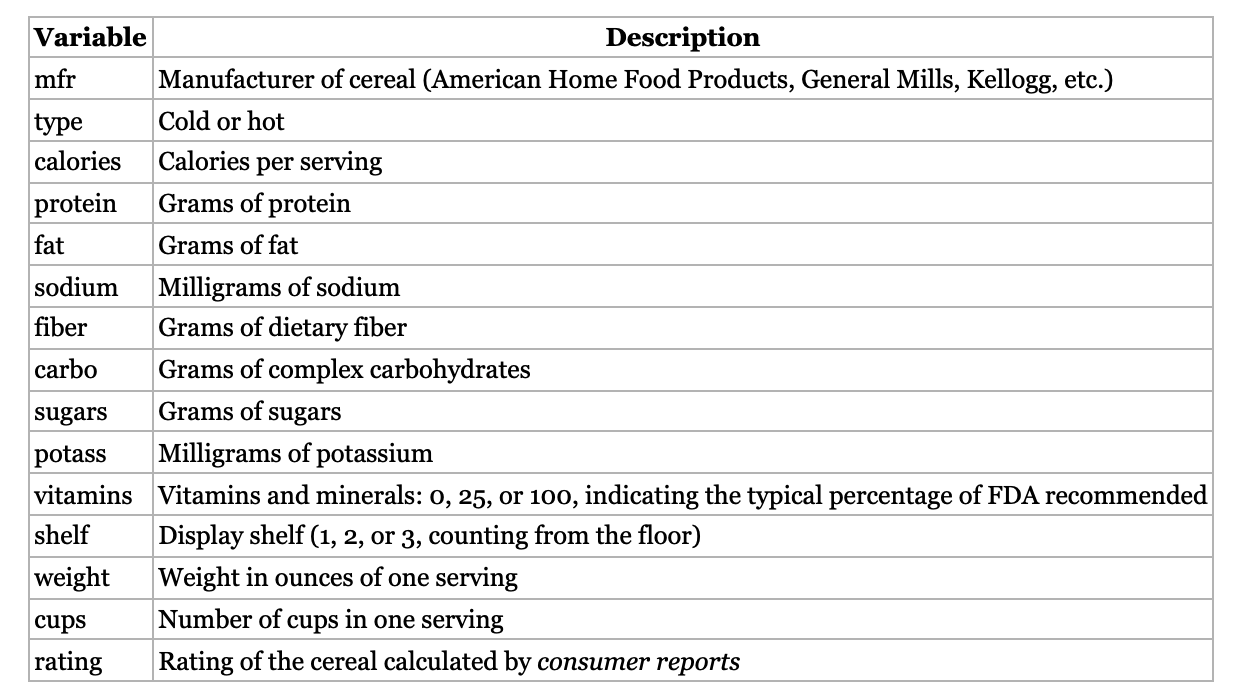

In [16]:
#Description of the Variables in the Breakfast Cereal Dataset
from IPython.display import Image
Image(filename='CerealVarDesc.png')

In [17]:
#checking for missing values and check if any missing values we will drop it 
for coloumn in cereals_df.columns:
    numberOfMissingVal = cereals_df[coloumn].isnull().sum()
    print('Number of missing values for %s is %d: ' %(coloumn,numberOfMissingVal))
    if numberOfMissingVal:
        cereals_df.dropna(subset = [coloumn],inplace = True)
        print('Number of missing values for %s after drop is %d: ' %(coloumn,cereals_df[coloumn].isnull().sum()))
    

Number of missing values for name is 0: 
Number of missing values for mfr is 0: 
Number of missing values for type is 0: 
Number of missing values for calories is 0: 
Number of missing values for protein is 0: 
Number of missing values for fat is 0: 
Number of missing values for sodium is 0: 
Number of missing values for fiber is 0: 
Number of missing values for carbo is 1: 
Number of missing values for carbo after drop is 0: 
Number of missing values for sugars is 0: 
Number of missing values for potass is 2: 
Number of missing values for potass after drop is 0: 
Number of missing values for vitamins is 0: 
Number of missing values for shelf is 0: 
Number of missing values for weight is 0: 
Number of missing values for cups is 0: 
Number of missing values for rating is 0: 


In [18]:
# select numerical features for PCA
features = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins', 'weight', 'cups','rating']
# Separating out the features
PCA_DF = cereals_df.loc[:, features]
PCA_DF.head(3)

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,weight,cups,rating
0,70,4,1,130,10.0,5.0,6.0,280.0,25,1.0,0.33,68.402973
1,120,3,5,15,2.0,8.0,8.0,135.0,0,1.0,1.00,33.983679
2,70,4,1,260,9.0,7.0,5.0,320.0,25,1.0,0.33,59.425505


In [19]:
#Standardize the Data
normalizedFeatures = preprocessing.scale(PCA_DF)


In [20]:
## running the PCA and getting the summary
pca = PCA()
pca.fit(normalizedFeatures)
pcaSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                           'Proportion of variance': pca.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pcaSummary_df = pcaSummary_df.transpose()
pcaSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcaSummary_df.columns) + 1)]
pcaSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
Standard deviation,1.9033,1.7319,1.3912,1.0047,0.8600,0.8465,0.7723,0.6038,0.3070,0.2574,0.1405,0.0
Proportion of variance,0.2978,0.2466,0.1591,0.0830,0.0608,0.0589,0.0490,0.0300,0.0077,0.0054,0.0016,0.0
Cumulative proportion,0.2978,0.5444,0.7035,0.7865,0.8473,0.9062,0.9552,0.9852,0.9929,0.9984,1.0000,1.0


By checking the Cumulative proportion we can see the first seven components account for more than 95% (ratio of variance to keep) of the total variation associated with all 11 of the original variables. This suggests that we can capture most of the variability in the data with 8 principle components. 

In [21]:
pcaComponents_df = pd.DataFrame(pca.components_.transpose(), columns=pcaSummary_df.columns, 
                                index=cereals_df[features].columns)
pcaComponents_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12
calories,-0.367008,-0.337060,0.114622,0.276607,-0.247587,0.089122,0.009769,0.021013,0.490843,0.233562,-0.491997,2.339398e-01
protein,0.277224,-0.244919,0.276895,0.420311,0.183041,0.121530,-0.147554,0.702587,-0.013017,-0.039614,0.098371,-1.863851e-01
fat,-0.104944,-0.334341,-0.205085,0.600379,0.366027,-0.109459,0.185133,-0.406861,-0.166590,0.080455,0.294228,9.013898e-02
sodium,-0.201561,-0.115025,0.389230,-0.236708,0.320442,-0.717287,-0.222566,0.082243,0.005585,0.075209,0.049456,2.387372e-01
fiber,0.418096,-0.288097,0.069330,-0.208259,0.043436,-0.010865,-0.168689,-0.302022,0.259518,0.553824,0.056276,-4.417036e-01
carbo,-0.163666,0.194881,0.562680,0.207181,-0.382880,-0.037902,0.119675,-0.213045,0.248304,-0.162525,0.478799,-2.250341e-01
sugars,-0.287402,-0.314168,-0.355676,-0.288938,-0.102102,0.180111,-0.204732,0.233438,0.252355,0.018614,0.614354,1.672565e-01
potass,0.344321,-0.397019,0.067125,-0.090113,0.023657,0.034886,-0.202493,-0.288777,0.211778,-0.715475,-0.109551,1.275321e-01
vitamins,-0.155787,-0.119645,0.388109,-0.340924,0.492871,0.481098,0.463410,-0.027424,0.029959,0.009012,0.006976,6.043328e-02
weight,-0.128112,-0.457860,0.246651,-0.121601,-0.415977,0.121035,-0.100570,-0.070801,-0.698641,0.078636,-0.035100,3.882249e-09


Examining the weights, we see that the first principal component measures the balance between two quantities: (1) calories and cups (large negative weights) vs. (2) protein, fiber, potassium, and consumer rating (large positive weights). High scores on principal component 1 mean that the cereal is low in calories and the amount per bowl, and high in protein, and potassium. Unsurprisingly, this type of cereal is associated with a high consumer rating. The second principal component is most affected by the weight of a serving, and the third principal component by the carbohydrate content. We can continue labeling the next principal components in a similar fashion to learn about the structure of the data.

In [22]:
# PCA for IRIS example
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
IRIS_df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
IRIS_df.head(10)

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [23]:
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
pca = PCA()
pca.fit(preprocessing.scale(IRIS_df.loc[:,features]))
pcaSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pca.explained_variance_),
                           'Proportion of variance': pca.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pca.explained_variance_ratio_)})
pcaSummary_df = pcaSummary_df.transpose()
pcaSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcaSummary_df.columns) + 1)]
pcaSummary_df.round(4)

,PC1,PC2,PC3,PC4
Standard deviation,1.7118,0.9630,0.3852,0.1440
Proportion of variance,0.7277,0.2303,0.0368,0.0052
Cumulative proportion,0.7277,0.9580,0.9948,1.0000


## by looking at Cumulative proportion what do you get??


In [24]:

pcaComponents_df = pd.DataFrame(pca.components_.transpose(), columns=pcaSummary_df.columns, 
                                index=IRIS_df[features].columns)
pcaComponents_df

,PC1,PC2,PC3,PC4
sepal length,0.522372,0.372318,-0.721017,-0.261996
sepal width,-0.263355,0.925556,0.242033,0.124135
petal length,0.581254,0.021095,0.140892,0.801154
petal width,0.565611,0.065416,0.633801,-0.523546


# what can you infer from the table above?

In [25]:
### getting scores for Principle components for each sample
scores = pca.fit_transform(preprocessing.scale(IRIS_df.loc[:,features]))
scores = pd.DataFrame(scores, columns=[f'PC{i}' for i in range(1, 5)])
scores.head(10)


,PC1,PC2,PC3,PC4
0,-2.264542,0.505704,-0.121943,-0.023073
1,-2.086426,-0.655405,-0.227251,-0.103208
2,-2.367950,-0.318477,0.051480,-0.027825
3,-2.304197,-0.575368,0.098860,0.066311
4,-2.388777,0.674767,0.021428,0.037397
5,-2.070537,1.518549,0.030684,-0.004399
6,-2.445711,0.074563,0.342198,0.038097
7,-2.233842,0.247614,-0.082574,0.025505
8,-2.341958,-1.095146,0.153562,0.026794
9,-2.188676,-0.448629,-0.246560,0.039907


In [26]:
## adding the type of flower for each sample
finalDf = pd.concat([scores.iloc[:,:2], IRIS_df[['target']]], axis = 1)
finalDf.head(10)

,PC1,PC2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa
5,-2.070537,1.518549,Iris-setosa
6,-2.445711,0.074563,Iris-setosa
7,-2.233842,0.247614,Iris-setosa
8,-2.341958,-1.095146,Iris-setosa
9,-2.188676,-0.448629,Iris-setosa


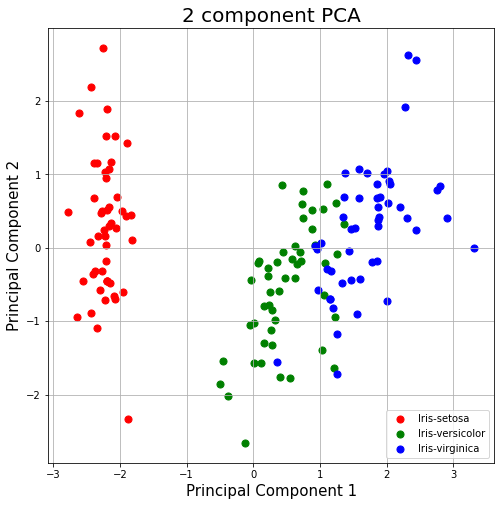

In [27]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()